## Data analysis for language
how is language represented in the catalogue and how does that change over time?

divisions into language, name/gender, type

- how many of each type
- obvious gaps
- most frequent/least frequent
- frequency distribution over time
- publication gaps over time
- years with lots of publications or no publications in certain languages
- for diff. languages is the title/description in the language?

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../nls-catalogue-published-material/data_cleaned.csv')

In [4]:
def frequency_counts(df, col_group, col_type, time_col='date'):
    """
    For each unique value in col_type, returns:
    - Frequency counts of items in col_group
    - Frequency distribution of items in col_group over time (by time_col)
    """
    results = {}
    print(f"Unique types in '{col_type}': {df[col_type].nunique()}")
    for t in df[col_type].dropna().unique():
        subset = df[df[col_type] == t]
        print(f"Processing {t} wi`th {len(subset)} records.")
        freq_counts = subset[col_group].value_counts()
        freq_dist = subset.groupby([time_col, col_group]).size().unstack(fill_value=0)
        results[t] = {
            'frequency_counts': freq_counts,
            'frequency_distribution_over_time': freq_dist
        }
    return results

In [5]:
# Get frequency counts and distribution over time for 'Language' and 'Subject'
language_results = frequency_counts(df, col_group='subject', col_type='language', time_col='date')

Unique types in 'language': 349
Processing Russian wi`th 29834 records.
Processing English wi`th 4171764 records.
Processing Undetermined wi`th 47813 records.
Processing Latin wi`th 62185 records.
Processing Irish wi`th 6936 records.
Processing Polish wi`th 8158 records.
Processing Welsh wi`th 16269 records.
Processing French wi`th 125319 records.
Processing German wi`th 108951 records.
Processing No linguistic content wi`th 21256 records.
Processing Italian wi`th 41031 records.
Processing Spanish wi`th 27459 records.
Processing Croatian wi`th 725 records.
Processing Persian wi`th 502 records.
Processing Swedish wi`th 6344 records.
Processing Ewondo wi`th 1 records.
Processing Arabic wi`th 1745 records.
Processing Scottish Gaelic wi`th 4761 records.
Processing Dutch wi`th 9391 records.
Processing Slovak wi`th 343 records.
Processing Scots wi`th 2261 records.
Processing Greek, Modern (1453-) wi`th 3048 records.
Processing Norwegian wi`th 4962 records.
Processing Multiple languages wi`th

In [6]:
type_





results = frequency_counts(df, col_group='subject', col_type='type', time_col='date')

Unique types in 'type': 4098
Processing text wi`th 4564288 records.
Processing notated music wi`th 326979 records.
Processing cartographic wi`th 79208 records.
Processing Children's stories. wi`th 1629 records.
Processing Graphic novels. wi`th 699 records.
Processing Children's storiesPictorial works.lcsh wi`th 1436 records.
Processing Domestic fiction.lcsh wi`th 240 records.
Processing Children's stories.lcsh wi`th 2050 records.
Processing Graphic novels.fast(OCoLC)fst01726630 wi`th 137 records.
Processing Zeitschrift.swd wi`th 40 records.
Processing Electronic journals. wi`th 4171 records.
Processing Periodicals.lcgft wi`th 2365 records.
Processing Periodicals.fast(OCoLC)fst01411641 wi`th 13780 records.
Processing Pictorial works.fast(OCoLC)fst01423874 wi`th 679 records.
Processing Juvenile works.fast(OCoLC)fst01411637 wi`th 1046 records.
Processing Conference papers and proceedings.fast(OCoLC)fst01423772 wi`th 346 records.
Processing History.fast(OCoLC)fst01411628 wi`th 5028 records

### Alternative Visualizations for Large, Sparse Data
Below are several code examples for visualizing large, sparse data like this catalogue:
- Top-N bar plots
- Line plots (trends over time)
- Stacked area plots
- Interactive plots (Plotly)
- Sankey/Alluvial diagrams
- Facet grids (small multiples)

In [7]:
!pip install plotly

/var/folders/lj/04hpcjd52tn74mrbmxn522fh0000gp/T/ipykernel_4377/2934542175.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subjects.values, y=top_subjects.index, orient='h', palette='Blues_r')


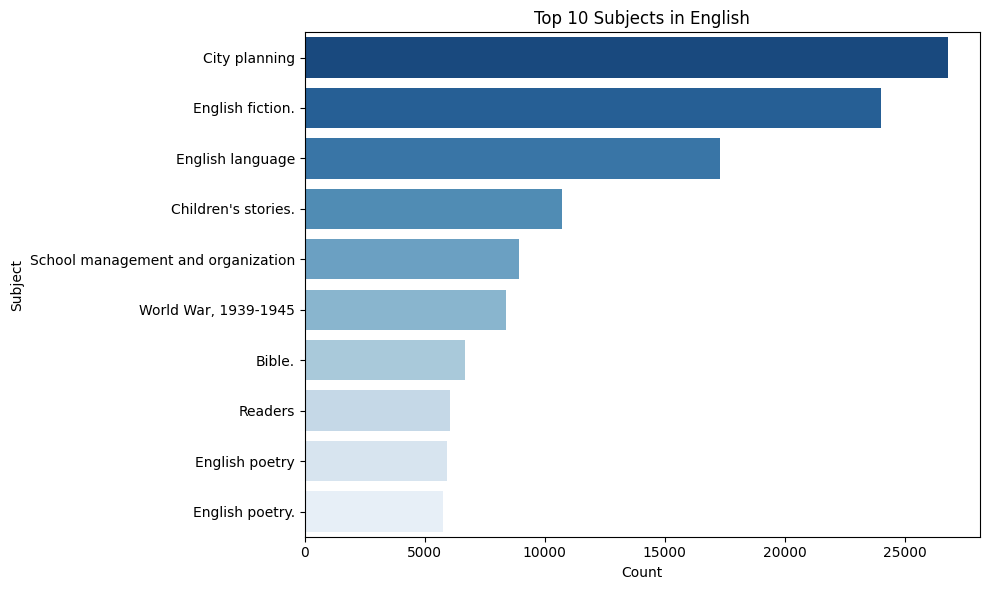

In [8]:
# 1. Top-N Bar Plot: Top 10 Subjects for a Selected Language
selected_language = 'English'  # Change as needed
top_n = 10
top_subjects = language_results[selected_language]['frequency_counts'].head(top_n)
plt.figure(figsize=(10,6))
sns.barplot(x=top_subjects.values, y=top_subjects.index, orient='h', palette='Blues_r')
plt.title(f'Top {top_n} Subjects in {selected_language}')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.tight_layout()
plt.show()

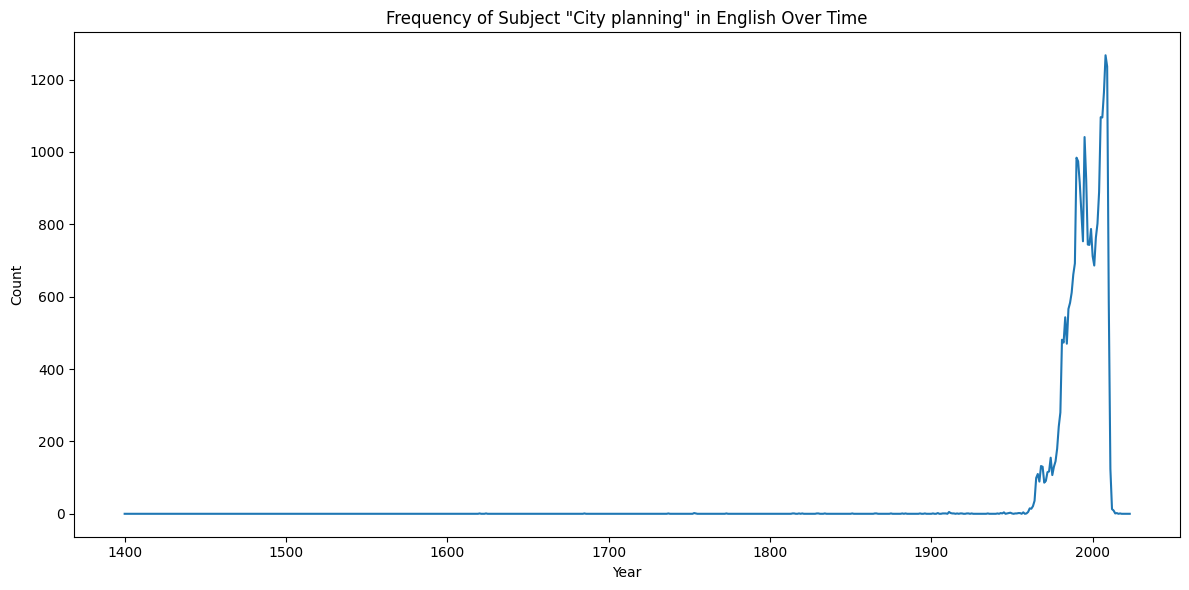

In [9]:
# 2. Line Plot: Frequency of a Subject Over Time for a Selected Language
subject_of_interest = top_subjects.index[0]  # Use the most common subject, or set manually
freq_over_time = language_results[selected_language]['frequency_distribution_over_time'][subject_of_interest]
plt.figure(figsize=(12,6))
freq_over_time.plot()
plt.title(f'Frequency of Subject "{subject_of_interest}" in {selected_language} Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

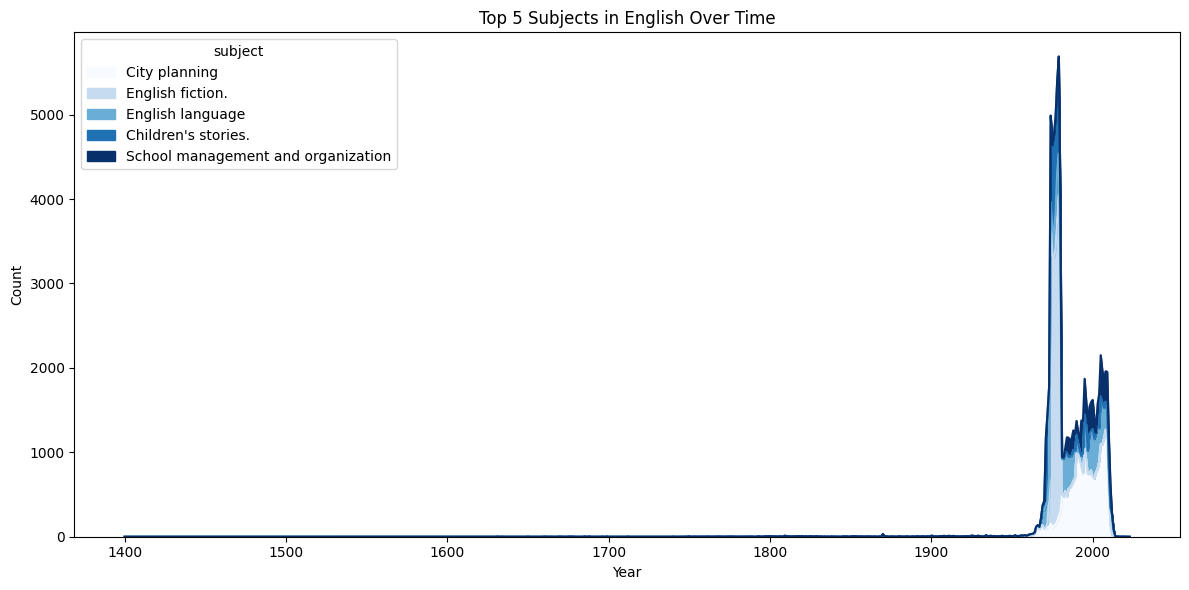

In [10]:
# 3. Stacked Area Plot: Top 5 Subjects Over Time for a Selected Language
top_n_area = 5
top_subjects_area = language_results[selected_language]['frequency_counts'].head(top_n_area).index
freq_dist_area = language_results[selected_language]['frequency_distribution_over_time'][top_subjects_area]
freq_dist_area.plot.area(figsize=(12,6), cmap='Blues')
plt.title(f'Top {top_n_area} Subjects in {selected_language} Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [11]:
!pip install jupyter
!pip install --upgrade nbformat

In [12]:
# 4. Interactive Plot: Top 10 Subjects for a Selected Language (Plotly)
import plotly.express as px
fig = px.bar(top_subjects[::-1], x=top_subjects.values[::-1], y=top_subjects.index[::-1], orientation='h',
             title=f'Top {top_n} Subjects in {selected_language} (Interactive)', labels={'x':'Count', 'y':'Subject'})
fig.show()

In [ ]:
# 5. Sankey Diagram: Flow from Language to Top Subjects (Aggregated)
import plotly.graph_objects as go
from collections import Counter

# Aggregate top 5 subjects across all languages (by name, not number)
top_subjects_all = Counter()
for lang, data in language_results.items():
    # data['frequency_counts'] should have subject names as index
    top_subjects_all.update(data['frequency_counts'].head(5))

# Get the top 5 subject NAMES (not numbers)
top_subjects_list = [s for s, _ in top_subjects_all.most_common(5)]

sources, targets, values = [], [], []
for lang, data in language_results.items():
    for subj in top_subjects_list:
        count = data['frequency_counts'].get(subj, 0)
        if count > 0:
            sources.append(lang)
            targets.append(subj)
            values.append(count)

# Create label list: languages first, then subjects (with names)
language_labels = sorted(set(sources))
subject_labels = [f"Subject: {s}" for s in top_subjects_list]
all_labels = language_labels + subject_labels

# Map sources and targets to their indices in all_labels
source_idx = [all_labels.index(s) for s in sources]
target_idx = [all_labels.index(f"Subject: {t}") for t in targets]

fig = go.Figure(data=[go.Sankey(
    node=dict(label=all_labels, pad=20, thickness=20),
    link=dict(source=source_idx, target=target_idx, value=values)
    )])
fig.update_layout(
    title_text="Sankey Diagram: Language to Top Subjects",
    font_size=12,
    height=800  # Make the diagram taller
    )
fig.show()

Russian subject
World War, 1939-1945    1540
Russian literature       793
Authors, Russian         396
Russian poetry.          320
Russian language         304
Name: count, dtype: int64
--------------
English subject
City planning                         26792
English fiction.                      24014
English language                      17296
Children's stories.                   10737
School management and organization     8926
Name: count, dtype: int64
--------------
Undetermined subject
Band music.                                        21
Band music                                         14
Russian literature                                 12
Choruses, Secular (Mixed voices) with orchestra    12
Bible.                                             10
Name: count, dtype: int64
--------------
Latin subject
Monasticism and religious orders        470
Friedrich-Schiller-Universität Jena    355
Roman law                               333
Latin language                          326

/var/folders/lj/04hpcjd52tn74mrbmxn522fh0000gp/T/ipykernel_4377/3317081607.py:18: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



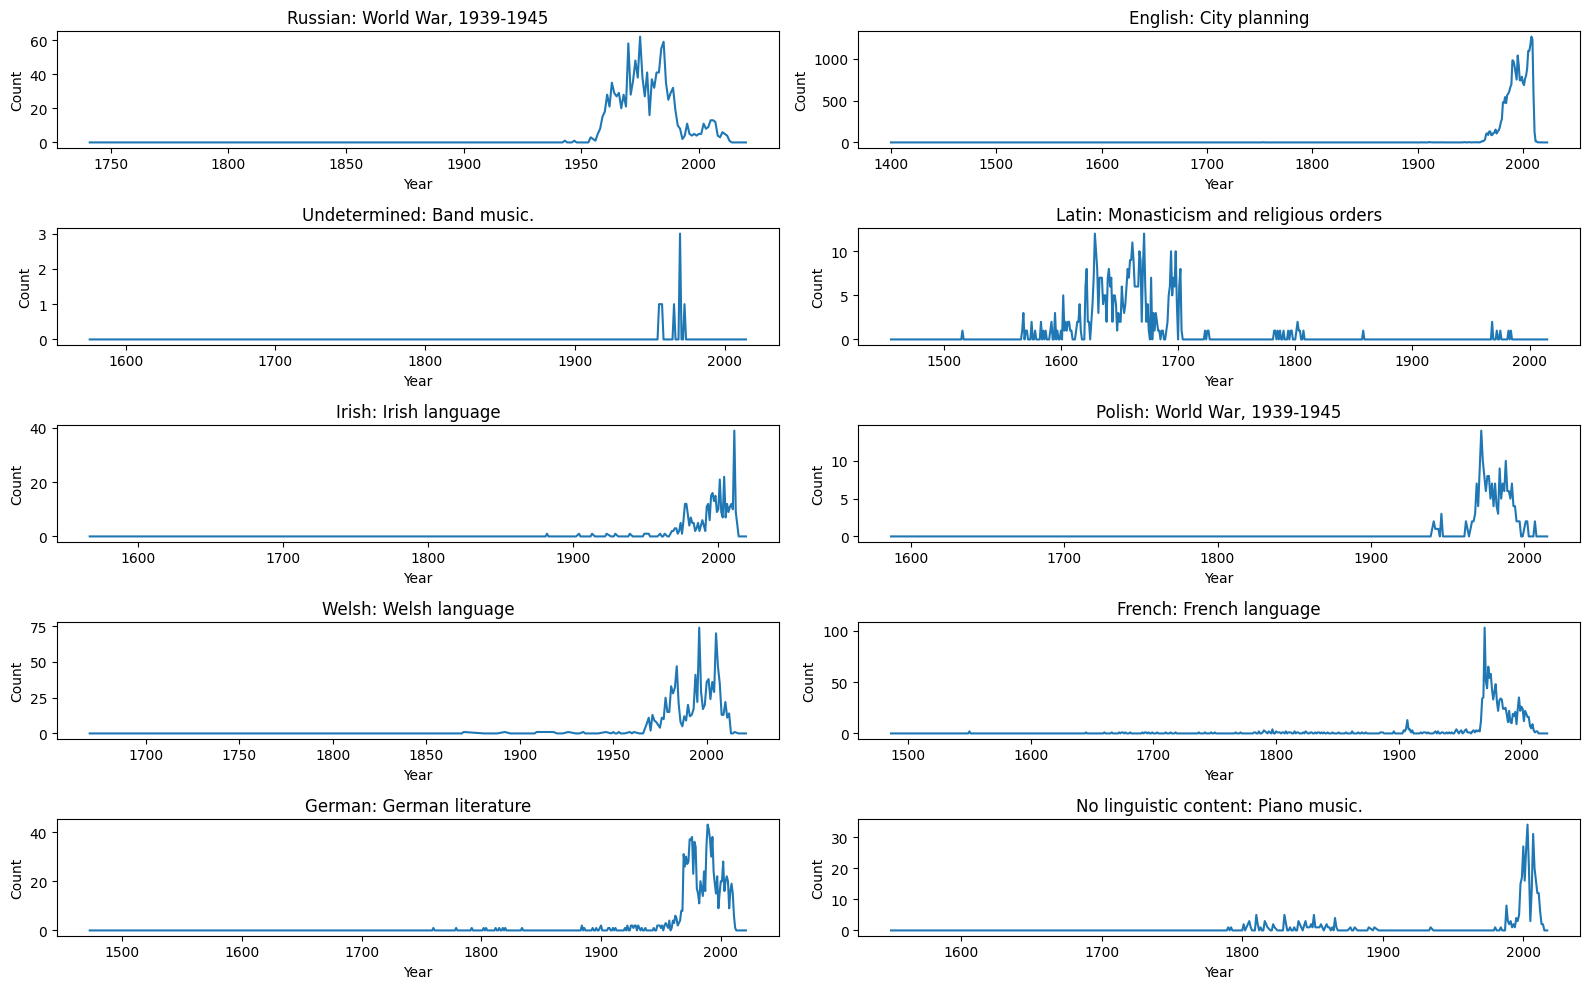

In [14]:
# 6. Facet Grid: Top Subject Trends for Top 4 Languages (Small Multiples)
top_languages = list(language_results.keys())[:10]  # Adjust as needed
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(5, 2)
for i, lang in enumerate(top_languages):
    ax = fig.add_subplot(gs[i])
    top_subject = language_results[lang]['frequency_counts'].idxmax()
    freq_over_time = language_results[lang]['frequency_distribution_over_time'][top_subject]
    freq_over_time.plot(ax=ax)
    ax.set_title(f'{lang}: {top_subject}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()